## CS867: Computer Vision


> Semantic Segmentation Using UNET Segmentation Model and MobileNet as Base Model/Backbone 

## Author <a name="data"></a>

<b>Name</b>: Waqas Rauf Khattak <br>
<b>CMS_ID</b>: 318256 <br>
<b>School</b>: School of Electrical Engineering anf Computer Science (SEECS) <br>
<b>University</b>: National University of Science and Technology (NUST) <br>
<b>Task</b>: Semantic Segmentation Using UNET Segmentation Model and MobileNet as Base Model/Backbone <br>
<b>Option Opted</b>: Option 01


In [ ]:
# Mounting Git Repository

pip install --upgrade git+https://github.com/WaqasRauf/CS867-Computer-Vision-Assignment-03.git

In [2]:
# Required Installations

!pip3 install tensorflow==2.4.1 
!pip3 install keras==2.4.3
!pip3 install opencv-python

     |████████████████████████████████| 394.3 MB 14 kB/s 
     |████████████████████████████████| 3.8 MB 41.8 MB/s 
     |████████████████████████████████| 462 kB 53.6 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68716 sha256=82211517f648485621c3c6f88c166ecd5caef5570dc08dd1fc466d1b9d0b2b8c
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.3
    Uninstalling wrapt-1.13.3:
      Successfully uninstalled wrapt-1.13.3
  Attempting uninstall:

In [3]:
# Mounting google drive

from google.colab import drive

drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/CV Assignments/Assignment 03/A3_Dataset/'
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/CV Assignments/Assignment 03/A3_Dataset
dataset1


In [4]:
# Defining Segmentation Model and Downloading Predefined Weights
 
from tensorflow import keras
from keras_segmentation.models.unet import mobilenet_unet

model = mobilenet_unet(n_classes=51 ,  input_height=416, input_width=608  )

17227776/17225924 [==============================] - 2s 0us/step


In [5]:
# Model Summary 

model.summary();

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 416, 608, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 418, 610, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 208, 304, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 208, 304, 32) 128         conv1[0][0]                      
____________________________________________________________________________________________

In [6]:
# Model Training

model.train(
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/",
    checkpoints_path = "/tmp/mobilenet_unet_1" ,
    input_width=608,
    n_classes=51,
    do_augment=True,
    val_images="dataset1/images_prepped_train/",
    val_annotations="dataset1/annotations_prepped_train/",
    augmentation_name="aug_all",
    epochs=5,
    validate=True,
    batch_size=2,
    val_batch_size=2,
    steps_per_epoch=512,
    val_steps_per_epoch=512,
)

Verifying training dataset


100%|██████████| 367/367 [08:55<00:00,  1.46s/it]


Dataset verified! 
Epoch 1/5
512/512 [==============================] - 206s 372ms/step - loss: 0.6454 - accuracy: 0.8234

Epoch 00001: saving model to /tmp/mobileNet_unet_1.00001
Epoch 2/5
512/512 [==============================] - 191s 374ms/step - loss: 0.2390 - accuracy: 0.9204

Epoch 00002: saving model to /tmp/mobileNet_unet_1.00002
Epoch 3/5
512/512 [==============================] - 191s 373ms/step - loss: 0.1665 - accuracy: 0.9424

Epoch 00003: saving model to /tmp/mobileNet_unet_1.00003
Epoch 4/5
512/512 [==============================] - 191s 374ms/step - loss: 0.1501 - accuracy: 0.9470

Epoch 00004: saving model to /tmp/mobileNet_unet_1.00004
Epoch 5/5
512/512 [==============================] - 191s 374ms/step - loss: 0.1260 - accuracy: 0.9547

Epoch 00005: saving model to /tmp/mobileNet_unet_1.00005


In [7]:
# Model Prediction

out = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png"
)

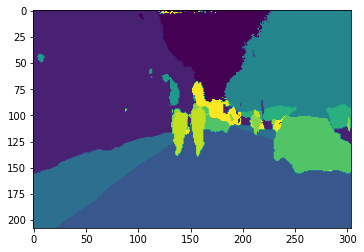

In [8]:
# Printing Semantic Class Labels

import matplotlib.pyplot as plt
plt.imshow(out)

In [11]:
# Evaluating the Model

print(model.evaluate_segmentation( inp_images_dir="dataset1/images_prepped_test/"  , annotations_dir="dataset1/annotations_prepped_test/" ) )

101it [02:54,  1.73s/it]

{'frequency_weighted_IU': 0.8691004285621979, 'mean_IU': 0.15317587321209622, 'class_wise_IU': array([0.94337205, 0.85204124, 0.13067749, 0.96493037, 0.86495141,
       0.90020122, 0.46922418, 0.65324257, 0.8121747 , 0.33897763,
       0.60626208, 0.2759146 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])}


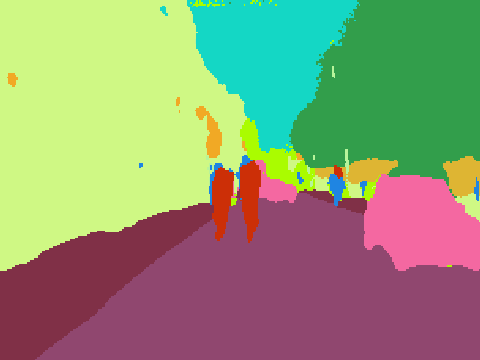

In [12]:
# Printing Semantic Mask

from IPython.display import Image
Image('/tmp/out.png')

In [13]:
o = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky",    "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]

)

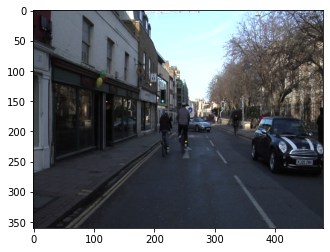

In [28]:
# Printing Orignial Image

import matplotlib.pyplot as plt
inp= "dataset1/images_prepped_test/0016E5_07965.png"
image = plt.imread(inp)
plt.imshow(image)

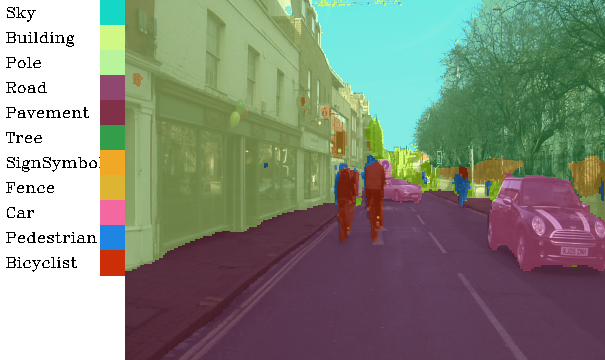

In [14]:
# Printing Super Imposed Image of Semantic Segmentation

from IPython.display import Image
Image('/tmp/out.png')

In [15]:
out = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_08057.png",
    out_fname="/tmp/out.png"
)

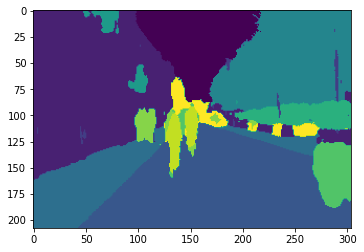

In [16]:
# Printing Semantic Class Labels

import matplotlib.pyplot as plt
plt.imshow(out)

In [17]:
# Evaluating the model 

print(model.evaluate_segmentation( inp_images_dir="dataset1/images_prepped_test/"  , annotations_dir="dataset1/annotations_prepped_test/" ) )

101it [00:27,  3.63it/s]

{'frequency_weighted_IU': 0.8691004285621979, 'mean_IU': 0.15317587321209622, 'class_wise_IU': array([0.94337205, 0.85204124, 0.13067749, 0.96493037, 0.86495141,
       0.90020122, 0.46922418, 0.65324257, 0.8121747 , 0.33897763,
       0.60626208, 0.2759146 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])}


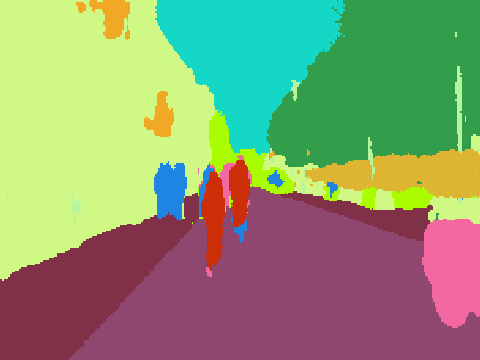

In [18]:
# Printing Semantic Mask

from IPython.display import Image
Image('/tmp/out.png')

In [19]:
o = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_08057.png",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky",    "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]

)

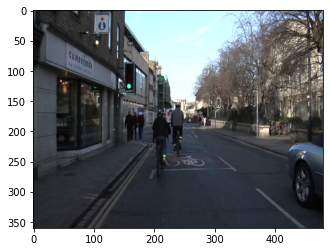

In [27]:
# Printing Orignial Image

import matplotlib.pyplot as plt
inp= "dataset1/images_prepped_test/0016E5_08057.png"
image = plt.imread(inp)
plt.imshow(image)

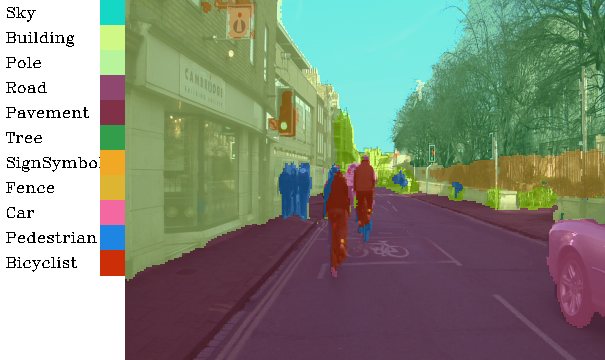

In [25]:
# Printing Super Imposed Image of Semantic Segmentation

from IPython.display import Image
Image('/tmp/out.png')